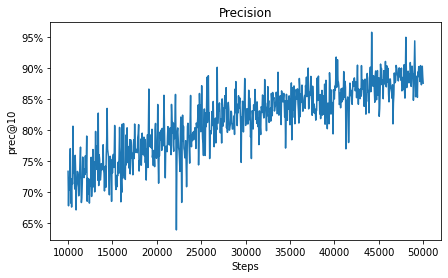

In [4]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Specify the path to your JSON log file
log_file_path = "/home/johny/catkin_ws/src/second_ros/trained_custom_v2/log.json.lst"

# Specify the metric you want to plot
metric_to_plot = "prec@10"

# Specify the range of steps to plot
start_step = 10000
end_step = 50000

# Initialize lists to store the steps and metric values
steps = []
metric_values = []

# Read the .json.lst file line by line
with open(log_file_path, "r") as file:
    for line in file:
        try:
            entry = json.loads(line.strip())
            step = entry["runtime"]["step"]
            if start_step <= step <= end_step:
                #metric_value = entry["pr"][metric_to_plot]
                #metric_value = entry[metric_to_plot]
                precision = entry["pr"]["prec@10"]
                recall = entry["pr"]["rec@10"]
                metric_value = 2 * (precision * recall) / (precision + recall)
                steps.append(step)
                metric_values.append(metric_value*100)
        except (json.JSONDecodeError, KeyError):
            continue

# Plot the graph
plt.plot(steps, metric_values)
plt.xlabel("Steps")
plt.ylabel(metric_to_plot)
# Set the Y axis tick format as a percentage
formatter = ticker.PercentFormatter(decimals=0)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Precision")
#plt.yscale("log")  # Set the y-axis scale to logarithmic
plt.gcf().set_figwidth(7)  # Adjust the width and height as needed
#plt.subplots_adjust(left=0.15, bottom=0.12, right=0.98, top=0.92)  # Adjust the margins as needed
#plt.savefig('../matplots/{}/[{}-{}]{}.jpeg'.format(metric_to_plot, start_step, end_step, metric_to_plot), dpi=600)
plt.show()

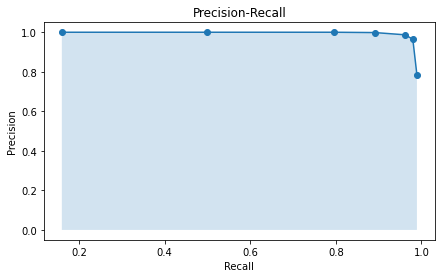

In [5]:
import json
import matplotlib.pyplot as plt

# Specify the path to your JSON log file
log_file_path = "/home/johny/catkin_ws/src/second_ros/trained_custom_v2/log.json.lst"

# Specify the step to calculate PR values
step = 50000

# Specify the list of thresholds (sorted in descending order)
thresholds = sorted([10, 30, 50, 70, 80, 90, 95], reverse=True)

# Initialize lists to store precision and recall values
precisions = []
recalls = []

# Read the .json.lst file line by line
with open(log_file_path, "r") as file:
    for line in file:
        try:
            entry = json.loads(line.strip())
            if entry["runtime"]["step"] == step:
                for threshold in thresholds:
                    precision = entry["pr"]["prec@{}".format(threshold)]
                    recall = entry["pr"]["rec@{}".format(threshold)]
                    precisions.append(precision)
                    recalls.append(recall)
        except (json.JSONDecodeError, KeyError):
            continue

# Plot the precision-recall curve
plt.gcf().set_figwidth(7)
plt.plot(recalls, precisions, marker='o')
plt.fill_between(recalls, precisions, alpha=0.2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
#plt.savefig("/home/johny/catkin_ws/src/tools/matplots/precision_recall_curve.jpeg", dpi=600)
plt.show()

In [6]:
# Calculate Average Precision (AP)
ap = 0.0
previous_recall = 0.0
for recall, precision in zip(recalls, precisions):
    ap += precision * (recall - previous_recall)
    previous_recall = recall

# Print the Average Precision
print("Average Precision (AP): {:.4f}".format(ap))

Average Precision (AP): 0.9859


46.566386517241384


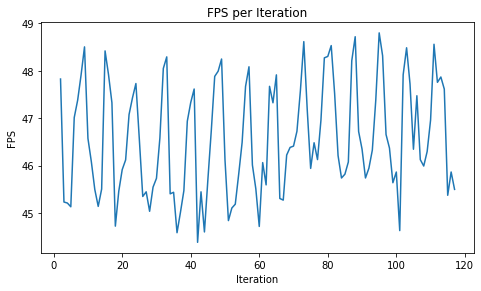

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Function to read data from the text file
filename = '/home/johny/catkin_ws/fps.log'  # Replace with the path to your text file
metric_to_plot = ""
x = []
y = []
values_history = []
with open(filename, 'r') as file:
    first_line = True
    for line in file:
        if first_line:
            first_line = False
            continue  # Skip the first iteration
        values = line.strip().split()
        values_history.append(float(values[1]))
        x.append(int(values[0]))
        y.append(float(values[1]))
print(sum(values_history) / len(values_history))
# Function to plot the graph
plt.plot(x, y)
plt.xlabel('Iteration')
plt.ylabel('FPS')
plt.title('FPS per Iteration')
plt.gcf().set_figwidth(7)  # Adjust the width and height as needed
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.98, top=0.92)  # Adjust the margins as needed
plt.savefig('/home/johny/catkin_ws/src/tools/matplots/run/fps.jpeg', dpi=600)
plt.show()

0.02148818103448275


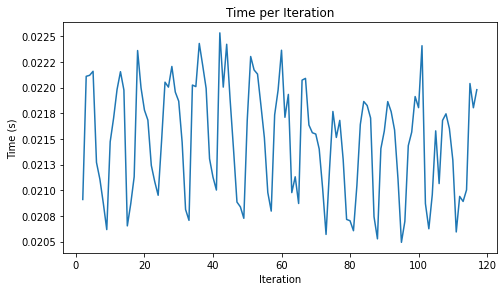

In [25]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Function to read data from the text file
filename = '/home/johny/catkin_ws/time.log'  # Replace with the path to your text file
x = []
y = []
values_history = []
with open(filename, 'r') as file:
    first_line = True
    for line in file:
        if first_line:
            first_line = False
            continue  # Skip the first iteration
        values = line.strip().split()
        values_history.append(float(values[1]))
        x.append(int(values[0]))
        y.append(float(values[1]))

print(sum(values_history) / len(values_history))
# Function to plot the graph
# Set the Y axis tick format as a percentage
formatter = ticker.FormatStrFormatter("%.4f")
plt.gca().yaxis.set_major_formatter(formatter)
plt.plot(x, y)
plt.xlabel('Iteration')
plt.ylabel('Time (s)')
plt.title('Time per Iteration')
plt.gcf().set_figwidth(7)  # Adjust the width and height as needed
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.98, top=0.92)  # Adjust the margins as needed
plt.savefig('/home/johny/catkin_ws/src/tools/matplots/run/time.jpeg', dpi=600)
plt.show()